<a href="https://colab.research.google.com/github/LauraAlejandraFuentesArevalo/DS_Laura_Alejandra_Fuentes/blob/main/Clase11_Oct19_datasetprofe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/data_set/claseOct19.csv"

In [ ]:
df = pd.read_csv(ruta)
df

,Case,Restaurant,Price,Food,Decor,Service,East
0,1,Daniella Ristorante,43,22,18,20,0
1,2,Tello's Ristorante,32,20,19,19,0
2,3,Biricchino,34,21,13,18,0
3,4,Bottino,41,20,20,17,0
4,5,Da Umberto,54,24,19,21,0
...,...,...,...,...,...,...,...
163,164,Baci,31,17,15,16,0
164,165,Puccini,26,20,16,17,0
165,166,Bella Luna,31,18,16,17,0
166,167,MÃ©tisse,38,22,17,21,0


In [ ]:
df.shape

(168, 7)

In [ ]:
df.describe()

,Case,Price,Food,Decor,Service,East
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000
mean,84.500000,42.696429,20.595238,17.690476,19.39881,0.630952
std,48.641546,9.292814,1.982674,2.702743,2.11394,0.483989
min,1.000000,19.000000,16.000000,6.000000,14.00000,0.000000
25%,42.750000,36.000000,19.000000,16.000000,18.00000,0.000000
50%,84.500000,43.000000,20.500000,18.000000,20.00000,1.000000
75%,126.250000,50.000000,22.000000,19.000000,21.00000,1.000000
max,168.000000,65.000000,25.000000,25.000000,24.00000,1.000000


In [ ]:
#verficiacion de si hay nulos
#Si hay 0 es un dataset nulo
df.isnull().sum()
#En caso de que haya algunos 0,   df=df.dropna()
#y luego volvemos a df.isnull().sum()
#Lo siguiente lo haremos solo si todo aparece 0 

Case          0
Restaurant    0
Price         0
Food          0
Decor         0
Service       0
East          0
dtype: int64

In [ ]:
df.keys()

Index(['Case', 'Restaurant', 'Price', 'Food', 'Decor', 'Service', 'East'], dtype='object')

In [ ]:
df2=df[['Price', 'Food', 'Decor', 'Service']].copy()
df2

,Price,Food,Decor,Service
0,43,22,18,20
1,32,20,19,19
2,34,21,13,18
3,41,20,20,17
4,54,24,19,21
...,...,...,...,...
163,31,17,15,16
164,26,20,16,17
165,31,18,16,17
166,38,22,17,21


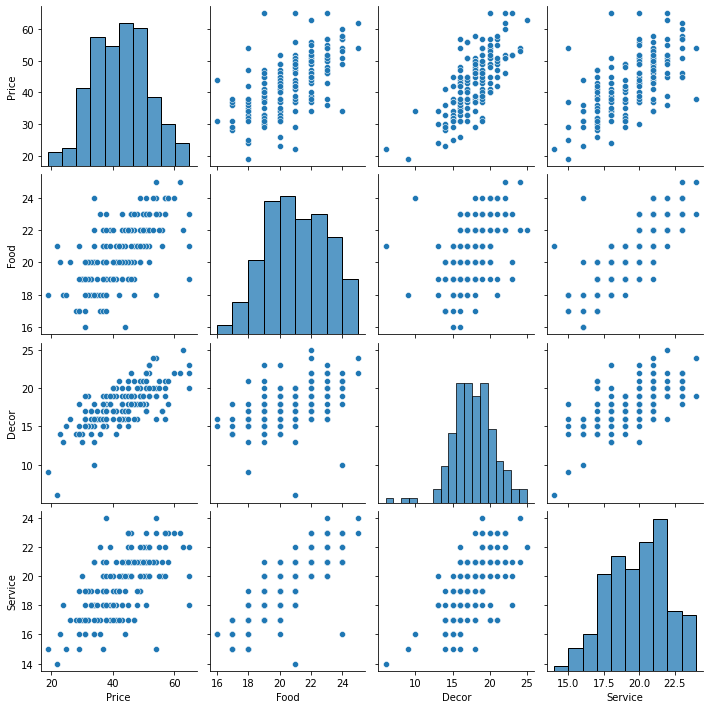

In [ ]:
#para generar un mapa general de todo 
#kind{"scatter","kde", "hist","reg"}
sns.pairplot(df2)
#sns.pairplot(df2, kind=hist)
#Está comparando todas las variables con todas

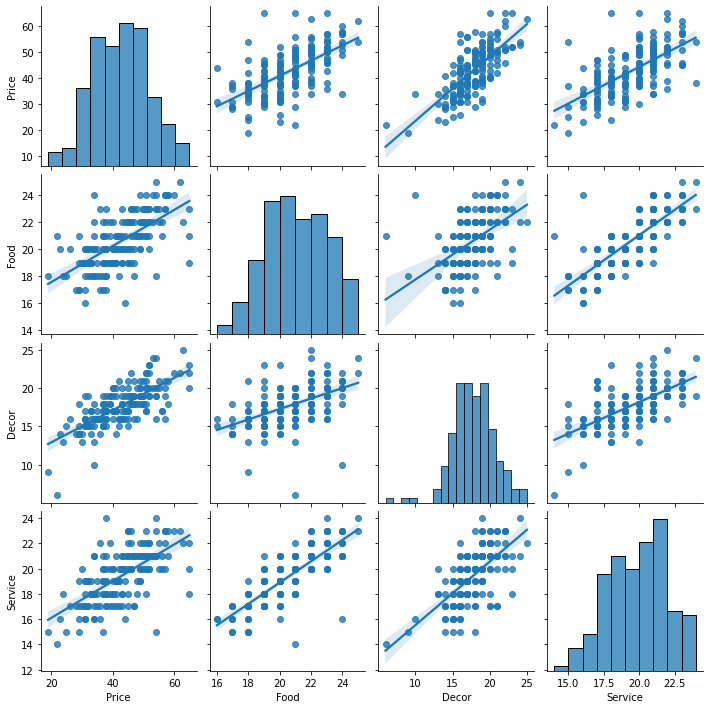

In [ ]:
#La de regresion
sns.pairplot(df2, kind="reg")

In [ ]:
y= df2["Price"]
x=df2[['Food', 'Decor', 'Service']]

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape) 

(134, 3) (34, 3) (134,) (34,)


In [ ]:
x_train

,Food,Decor,Service
61,19,16,17
44,22,17,21
24,22,20,22
63,20,19,19
89,21,15,18
...,...,...,...
9,21,17,19
103,18,15,17
67,17,14,15
117,19,17,19


In [ ]:
x_test

,Food,Decor,Service
151,23,19,23
56,23,17,20
123,20,23,20
60,24,20,21
100,19,18,21
51,20,20,20
7,20,18,21
5,22,22,21
86,23,18,20
135,19,19,18


In [ ]:
lineal=LinearRegression()
lineal

LinearRegression()

In [ ]:
lineal.fit(x_train,y_train)

LinearRegression()

In [ ]:
lineal.coef_.tolist()
#Cada coeficiente está asignado para cada variable que habiamos seleccionado
#[Food, Decor, Service]
#[1.268297790508605, 1.8844780325113775, 0.5122271339146043]

[1.268297790508605, 1.8844780325113775, 0.5122271339146043]

In [ ]:
y_pred_train_lineal = lineal.predict(x_train)
y_pred_train_lineal

array([36.30106958, 44.03934952, 50.20501075, 44.24725573, 37.46541426,
       50.20501075, 45.72345974, 37.42947695, 33.28818417, 46.94828182,
       44.75948287, 41.60670704, 38.69777474, 40.47829967, 41.85055057,
       51.47330854, 38.0815945 , 36.81329671, 54.11385723, 49.07660337,
       38.0815945 , 45.92382755, 50.00464294, 49.07660337, 50.96108141,
       54.73003747, 38.69777474, 34.41659155, 35.03277179, 38.0815945 ,
       38.59382164, 35.03277179, 33.69645819, 29.89156482, 35.54499892,
       43.93539641, 55.1383115 , 39.72222901, 44.65552976, 36.81329671,
       45.41160042, 32.53211351, 29.4832908 , 44.75948287, 37.97764139,
       42.87500483, 37.32552385, 41.85055057, 34.41659155, 18.45620343,
       34.92881868, 51.06503451, 31.98394907, 48.46042313, 35.44104581,
       39.21000188, 41.50275394, 51.57726165, 40.47829967, 51.98553567,
       46.54000779, 36.05722605, 40.07002564, 40.37434656, 45.1072795 ,
       30.8234632 , 52.60171592, 42.15487148, 36.50897579, 42.15

In [ ]:
y_pred_test_lineal = lineal.predict(x_test)
y_pred_test_lineal

array([50.10105764, 44.79542017, 52.297395  , 52.2293792 , 42.11893418,
       46.6439609 , 43.38723197, 53.46173968, 46.67989821, 42.46673081,
       32.63606662, 40.58225278, 35.03277179, 35.68488934, 33.04434065,
       44.03934952, 51.47330854, 39.21000188, 44.45516195, 32.18431688,
       40.47829967, 34.52054465, 40.37434656, 44.03934952, 34.00831752,
       46.02778066, 48.32053272, 47.80830558, 38.59382164, 55.75449174,
       48.32053272, 44.24725573, 33.764474  , 48.32053272])

In [ ]:
#GENERAR METRICAS PARA SABER QUÉ TAN PRECISO FUE EL SISTEMA DE COEFICIENTES QUE CREO PORQUE REVISA CUÁNTO SE SEPARÓ DE LO REAL DEL TEST 

In [ ]:
metrics.mean_squared_error(y_train,y_pred_train_lineal)

32.73360017596516

In [ ]:
metrics.mean_squared_error(y_test,y_pred_test_lineal)

34.90467923649517

Es normal que el de test sea mayor que el train porque el sistema no conocíá el TEST. 

In [ ]:
metrics.mean_absolute_error(y_train,y_pred_train_lineal)

4.5143548493673356

In [ ]:
y_error_train = y_train - y_pred_train_lineal
y_error_train

61     -5.301070
44     11.960650
24     -5.205011
63      4.752744
89     -0.465414
         ...    
9       2.253403
103    -1.148294
67      0.028936
117     1.789998
47     13.741175
Name: Price, Length: 134, dtype: float64

In [ ]:
y_error_test = y_test - y_pred_test_lineal
y_error_test

151     6.898942
56      6.204580
123    -0.297395
60      0.770621
100     0.881066
51     -6.643961
7      -9.387232
5      -1.461740
86      3.320102
135    -2.466731
54      1.363933
94     -1.582253
157    -1.032772
101     9.315111
73     -0.044341
45     -0.039350
74      0.526691
97      1.789998
139    -2.455162
96     -2.184317
107    -3.478300
106     1.479455
150     1.625653
166    -6.039350
55     19.991682
152    -7.027781
26      1.679467
143    -2.808306
155     3.406178
33     -4.754492
8      -9.320533
108   -13.247256
122     4.235526
37      3.679467
Name: Price, dtype: float64